## Initial Data Exploration of Hotel Reservations dataset

In [1]:
# Import required modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read the data from the CSV file and store it in a DataFrame
data = pd.read_csv(
    filepath_or_buffer='../data/raw/hotel_reservations.csv',
    sep=',',
    header=0
)

In [3]:
# Display the first few rows of the DataFrame
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
data.shape # Display the number of rows and columns in the DataFrame

(36275, 19)

In [5]:
data.dtypes.to_frame(name='Column Type') # Display the data types of each column and the column name

,Column Type
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


In [6]:
data.isna().sum().to_frame(name="Number of NA values") # Display the number of missing values in each column

,Number of NA values
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [7]:
# Display the summary statistics of the object columns
data.describe(include='object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


C:\Users\marij\AppData\Local\Temp\ipykernel_26144\2634241873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='type_of_meal_plan', ax=ax[0][0], palette='Set1')
C:\Users\marij\AppData\Local\Temp\ipykernel_26144\2634241873.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='room_type_reserved', ax=ax[0][1], palette='Set2')
C:\Users\marij\AppData\Local\Temp\ipykernel_26144\2634241873.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='market_segment_type', ax=ax[1][0], palette='Set3')
C:\Users\m

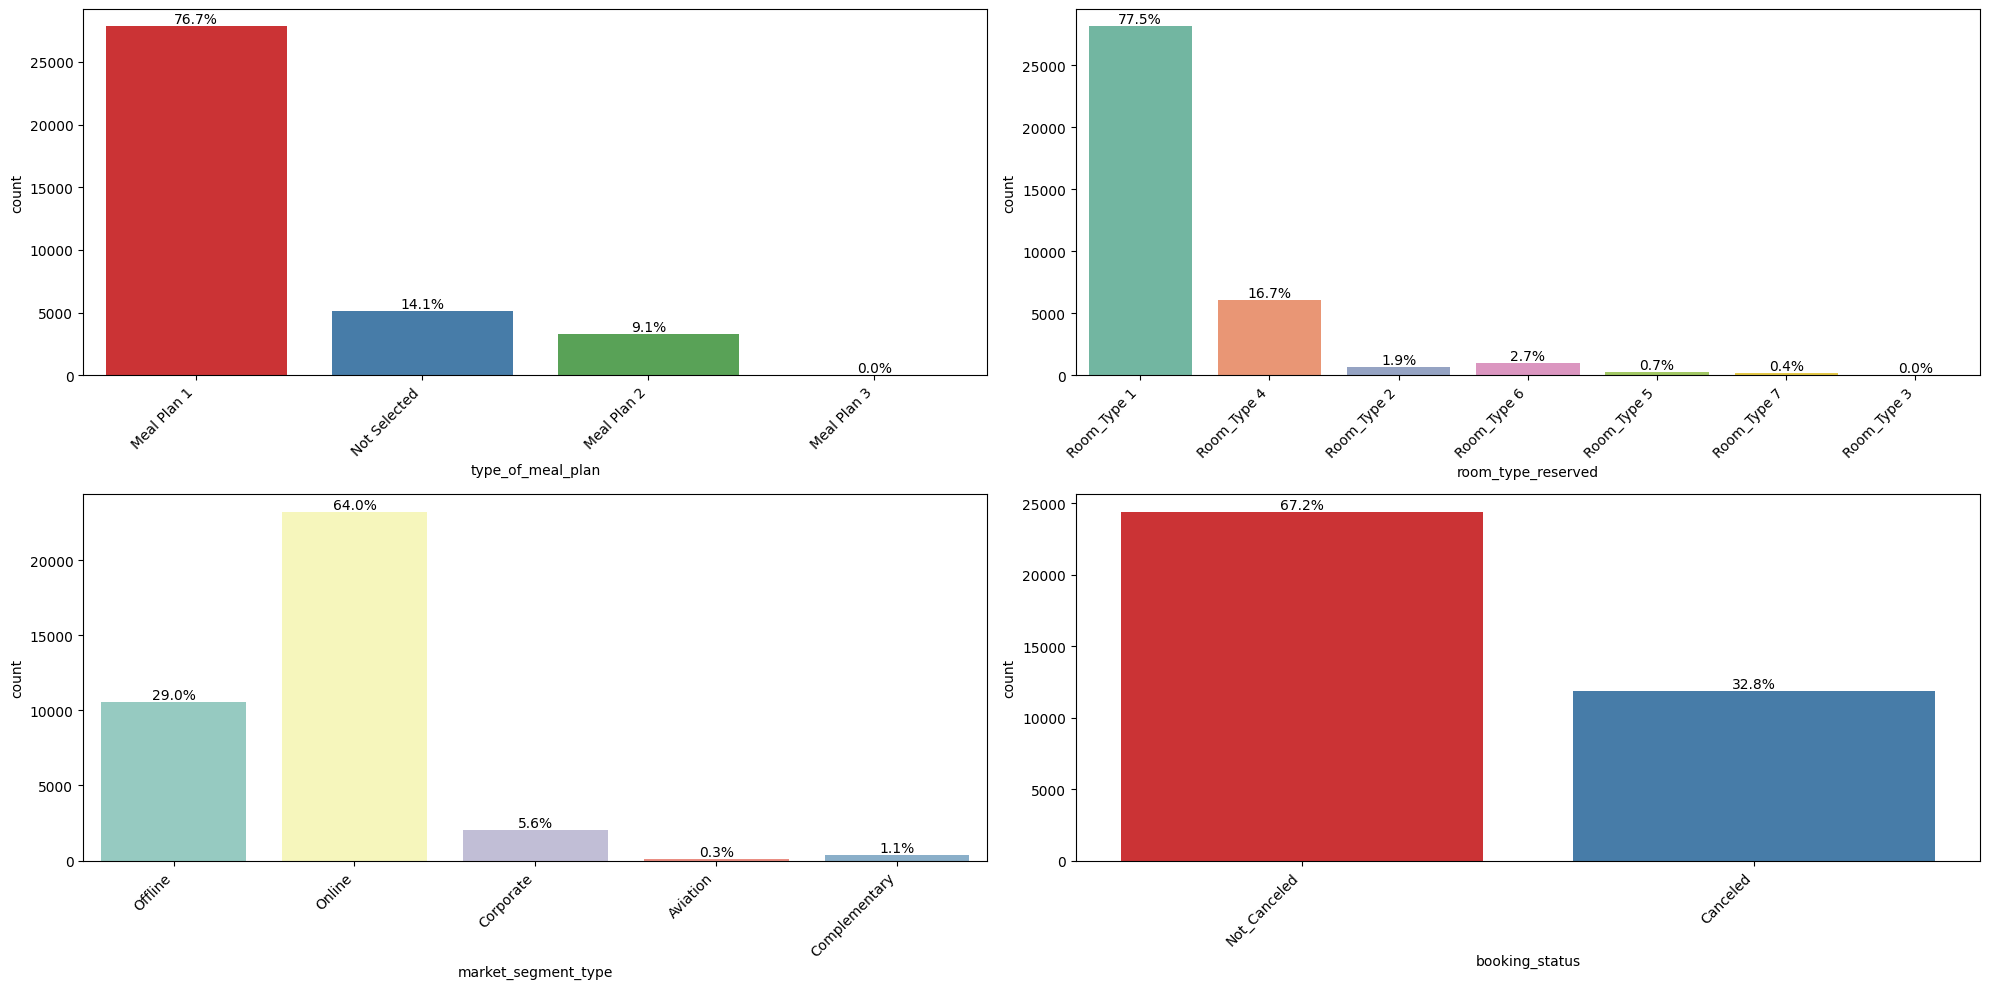

In [8]:
# Plot the occupancy rate of objects columns
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.countplot(data=data, x='type_of_meal_plan', ax=ax[0][0], palette='Set1')
sns.countplot(data=data, x='room_type_reserved', ax=ax[0][1], palette='Set2')
sns.countplot(data=data, x='market_segment_type', ax=ax[1][0], palette='Set3')
sns.countplot(data=data, x='booking_status', ax=ax[1][1], palette='Set1')

# Tilt x labels on each plot by 45 degrees
for ax_row in ax:
    for ax_col in ax_row:
        ax_col.set_xticklabels(ax_col.get_xticklabels(), rotation=45, ha='right')
        
# Add percentage labels to each bar
for ax_row in ax:
    for ax_col in ax_row:
        total = len(data) # Total number of data points
        for p in ax_col.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            ax_col.annotate(percentage, (x, y), ha='center', va='bottom')
        
# Increase the space between the axes
plt.tight_layout()

plt.show()

In [9]:
# Print the unique values in each column with object data (without the Booking_ID column) type and the number of occurrences of each value
for column in data.select_dtypes(include='object').columns:
    if column != 'Booking_ID':
        print(data[column].value_counts().to_frame(name="Number of Occurrences"))
        print("\n")

                   Number of Occurrences
type_of_meal_plan                       
Meal Plan 1                        27835
Not Selected                        5130
Meal Plan 2                         3305
Meal Plan 3                            5


                    Number of Occurrences
room_type_reserved                       
Room_Type 1                         28130
Room_Type 4                          6057
Room_Type 6                           966
Room_Type 2                           692
Room_Type 5                           265
Room_Type 7                           158
Room_Type 3                             7


                     Number of Occurrences
market_segment_type                       
Online                               23214
Offline                              10528
Corporate                             2017
Complementary                          391
Aviation                               125


                Number of Occurrences
booking_status                 

In [10]:
# Display the summary statistics of the numerical columns
data.describe().T.join(data.select_dtypes(include='number').isna().sum().to_frame(name="missing"))

,count,mean,std,min,25%,50%,75%,max,missing
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0,0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0,0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0,0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0,0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0,0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0,0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0,0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0,0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0,0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0,0


In [11]:
# Display the correlation matrix of the numerical columns
data.corr(numeric_only=True)

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.011429,0.097287,0.076719,0.021841,0.026338,-0.192277,-0.047426,-0.119166,0.296886,0.189401
no_of_children,-0.019787,1.000000,0.029478,0.024398,0.034244,-0.047091,0.045983,-0.003076,0.025482,-0.036348,-0.016390,-0.021189,0.337728,0.124486
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.031111,0.046595,0.055357,-0.009894,0.027304,-0.067107,-0.020690,-0.026312,-0.004525,0.060593
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.048784,0.149650,0.032672,0.037376,-0.009305,-0.099764,-0.030080,-0.049344,0.022753,0.045994
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,1.000000,-0.066445,0.015684,-0.015505,-0.000037,0.110909,0.027106,0.063810,0.061304,0.087922
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.066445,1.000000,0.143439,0.136814,0.006479,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645
arrival_year,0.076719,0.045983,0.055357,0.032672,0.015684,0.143439,1.000000,-0.339689,0.018849,-0.018175,0.003919,0.026422,0.178605,0.053205
arrival_month,0.021841,-0.003076,-0.009894,0.037376,-0.015505,0.136814,-0.339689,1.000000,-0.042780,0.000341,-0.038615,-0.010718,0.054423,0.110552
arrival_date,0.026338,0.025482,0.027304,-0.009305,-0.000037,0.006479,0.018849,-0.042780,1.000000,-0.015949,-0.012542,-0.001498,0.017898,0.018352
repeated_guest,-0.192277,-0.036348,-0.067107,-0.099764,0.110909,-0.135984,-0.018175,0.000341,-0.015949,1.000000,0.390810,0.539156,-0.174900,-0.011820


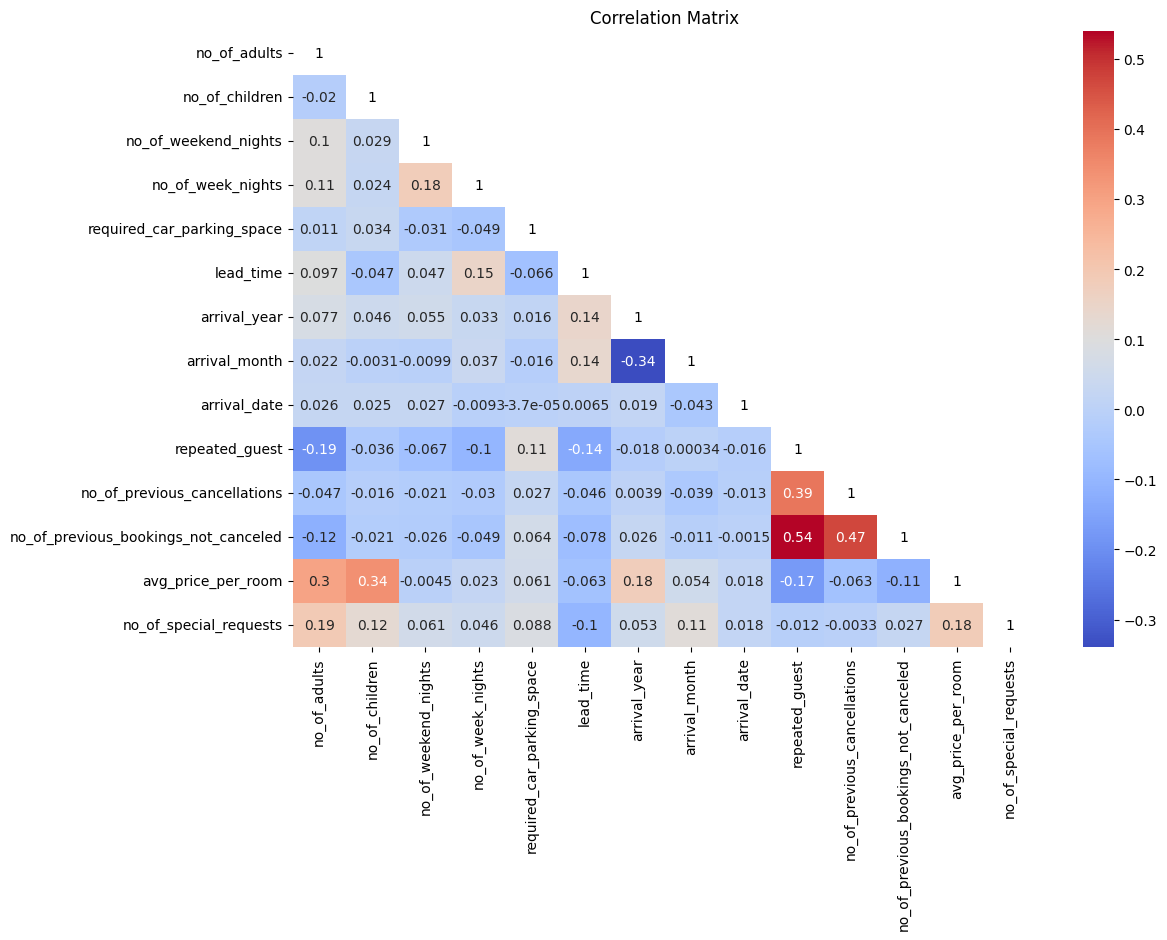

In [12]:
# Plot the one half of the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(data.corr(numeric_only=True), dtype=bool))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm', mask=mask)

# add the main diagonal to the heatmap
for i in range(len(data.corr(numeric_only=True))):
    plt.text(i + 0.5, i + 0.5, "1", ha="center", va="center", color="black")

plt.title("Correlation Matrix")
plt.show()

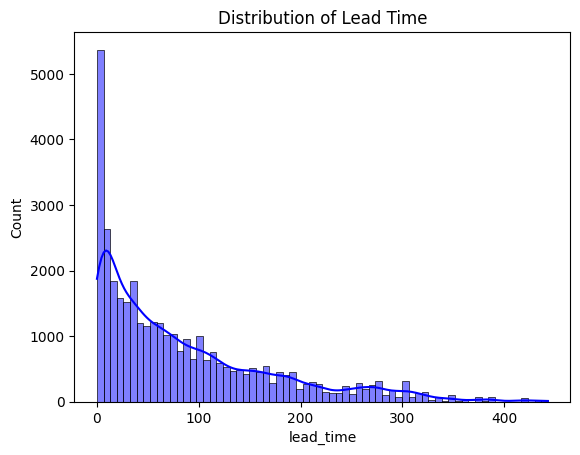

In [15]:
# Plot the distribution of the numerical columns
sns.histplot(data=data, x='lead_time', kde=True, color='blue')
plt.title("Distribution of Lead Time")
plt.show()

In [16]:
# Check the distribution of the lead_time column using statistical tests
from scipy.stats import shapiro, normaltest, anderson

# Perform the Shapiro-Wilk test
shapiro_stat, shapiro_p = shapiro(data['lead_time'])

# Perform the D'Agostino and Pearson's test
normaltest_stat, normaltest_p = normaltest(data['lead_time'])

# Perform the Anderson-Darling test
anderson_stat = anderson(data['lead_time'])

# Display the results of the tests
print("Shapiro-Wilk Test")
print("Statistic:", shapiro_stat)
print("P-value:", shapiro_p)
print("\n")

print("D'Agostino and Pearson's Test")
print("Statistic:", normaltest_stat)
print("P-value:", normaltest_p)
print("\n")

print("Anderson-Darling Test")
print("Statistic:", anderson_stat.statistic)
print("Critical Values:", anderson_stat.critical_values)
print("\n")

Shapiro-Wilk Test
Statistic: 0.8571282029151917
P-value: 0.0


D'Agostino and Pearson's Test
Statistic: 7078.787074569272
P-value: 0.0


Anderson-Darling Test
Statistic: 1590.191866879577
Critical Values: [0.576 0.656 0.787 0.918 1.092]




C:\Users\marij\AppData\Roaming\Python\Python312\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
